In [1]:
%load_ext autoreload
%autoreload 2

import MM_Util as mm
import numpy as np

/home/echung/Documents/repos/artdep/MM_Util/mol.py:104: SyntaxWarning: invalid escape sequence '\s'
  elif flags['read_geom'] == True and re.search('^\s*.\d', line):
/home/echung/Documents/repos/artdep/MM_Util/mol.py:129: SyntaxWarning: invalid escape sequence '\s'
  elif flags['normal_mode'] == True and re.search('^\s*\d*\s*.\d*', line) and len(line.split()) > 3:
/home/echung/Documents/repos/artdep/MM_Util/mol.py:148: SyntaxWarning: invalid escape sequence '\s'
  elif flags['read_geom'] == True and re.search('^\s*.\d', line):
/home/echung/Documents/repos/artdep/MM_Util/mol.py:161: SyntaxWarning: invalid escape sequence '\s'
  elif flags['read_geom'] == True and re.search('^\s*.\d', line):
/home/echung/Documents/repos/artdep/MM_Util/mol.py:171: SyntaxWarning: invalid escape sequence '\d'
  elif flags['jcoup_flag'] == True and re.search('-?\d\.\d+[Dd][+\-]\d\d?', line):
/home/echung/Documents/repos/artdep/MM_Util/mol.py:184: SyntaxWarning: invalid escape sequence '\s'
  elif flags['read

In [2]:
mol_pucker, mol_fem = mm.Mol('sample_data/'), mm.Mol('sample_data/')

mol_pucker.gromacs('ang_ring.xvg')
mol_fem.gromacs('fem_angles.xvg')

1C4      47725
4C1          5
1,4B       609
B1,4       125
2,5B       203
B2,5       321
3,6B       214
B3,6       238
1H2          0
2H1          0
2H3          0
3H2          0
3H4          0
4H3          0
4H5          0
5H4          0
5H6          0
6H5          0
6H1          0
1H6          0
1S3        296
3S1          0
5S1          0
1S5          0
6S2          0
2S6          0
1E         180
E1           0
2E          37
E2          47
3E           1
E3           0
4E           0
E4           0
5E           0
E5           0
6E           0
E6           0


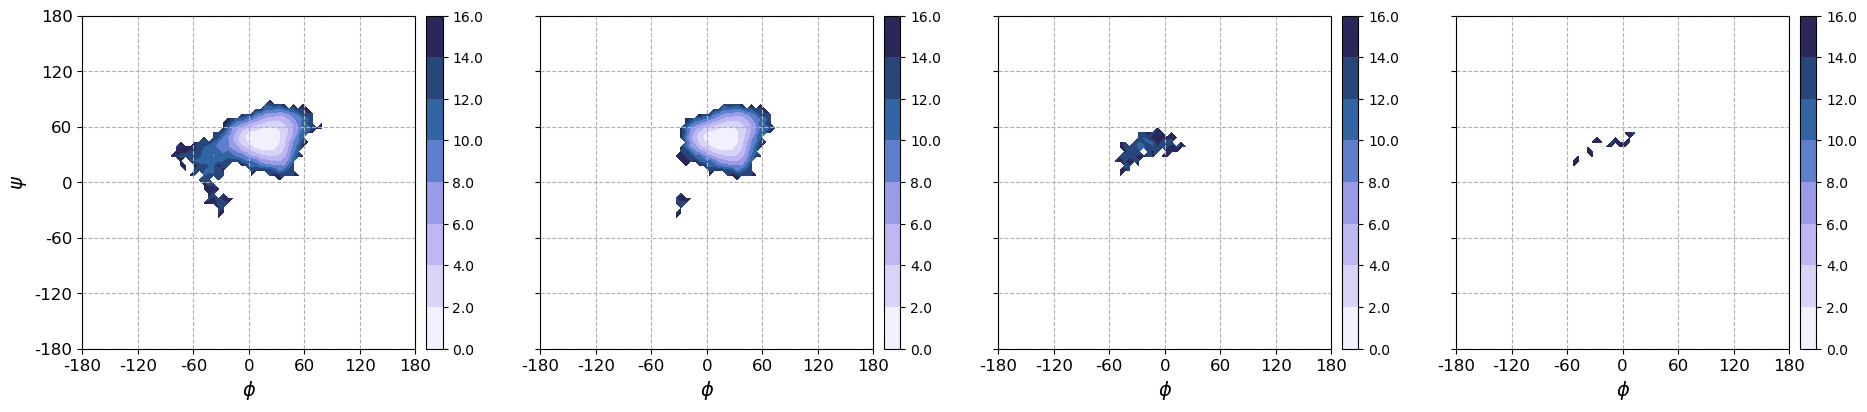

In [6]:
plot = mm.Plot()
plot.cmap(map='devon')
plot.puckers_hist(mol_pucker, mol_fem, puckers=['1C4', '1,4B', 'B2,5'], limit=16)